<a href="https://colab.research.google.com/github/sukhyun1017/-/blob/master/mask_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

전처리

In [17]:
import numpy as np 
import seaborn as sns
import pandas as pd 
import os
import matplotlib.pyplot as plt
import cv2
import matplotlib.patches as patches
import tensorflow as tf
from keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, Dropout
from keras.models import Sequential
from sklearn.model_selection import train_test_split

In [ ]:
images=os.path.join('/content/drive/MyDrive/images')
annotations=os.path.join('/content/drive/MyDrive/annotations')
df=pd.read_csv(os.path.join("/content/realdf.csv"))

In [ ]:
a=os.listdir(images)
b=os.listdir(annotations)
a.sort()
b.sort()

In [ ]:
print(len(b),len(a),len(df))

5002 6017 4995


(550, 445, 3)


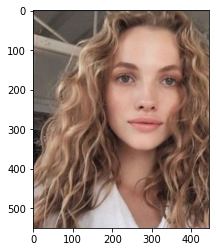

In [ ]:
img=plt.imread(os.path.join(images,a[4000]))
print(img.shape)
plt.imshow(img)
plt.show()

In [ ]:
options=['face_with_mask','face_no_mask','face_other_covering','face_with_mask_incorrect']
df= df[df['classname'].isin(options)]
df.sort_values('filename',axis=0,inplace=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [ ]:
df

,Unnamed: 0,ID,BoundingBox,classname,Attributes,filename,binclass
1586,6080,657569947608734848,"[438, 140, 822, 583]",face_other_covering,{},0001.jpg,0
1526,5845,984460083838631424,"[332, 9, 590, 371]",face_no_mask,{},0002.jpg,0
1844,7241,176055586223918496,"[1222, 9, 2645, 1746]",face_with_mask,{},0003.jpg,1
969,3640,442638353537322624,"[606, 114, 918, 460]",face_with_mask,{},0004.jpg,1
916,3423,161280555080022496,"[63, 25, 305, 337]",face_other_covering,{},0005.jpg,0
...,...,...,...,...,...,...,...
4628,17446,535760712507825728,"[69, 28, 381, 442]",face_with_mask,{},6424.jpg,1
4223,16389,505882883879967488,"[345, 56, 530, 296]",face_with_mask,{},6426.jpg,1
4636,17466,303196934241394048,"[218, 98, 577, 580]",face_with_mask_incorrect,{},6427.jpg,0
4383,16811,319807162564368000,"[146, 107, 304, 313]",face_with_mask,{},6433.jpg,1


In [ ]:
df.classname.value_counts()
len(df)

4732

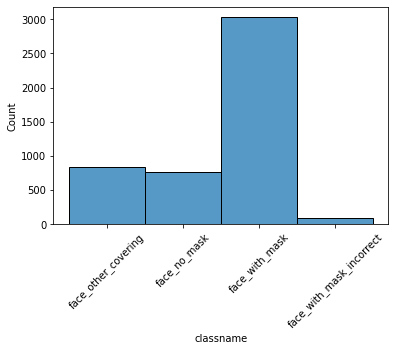

In [ ]:
sns.histplot(data=df, x="classname")
sns.set(rc={'figure.figsize':(20,6)})
sns.set(font_scale=1)
_ = plt.xticks(rotation=45)

In [ ]:
binary_classify_dict = {'face_with_mask':1,
                      'face_other_covering':0,
                     'face_no_mask':0,
                     'face_with_mask_incorrect':0,
                     }

df['binclass']= df['classname'].apply(lambda x: binary_classify_dict[x])

In [ ]:
df

,Unnamed: 0,ID,BoundingBox,classname,Attributes,filename,binclass
1586,6080,657569947608734848,"[438, 140, 822, 583]",face_other_covering,{},0001.jpg,0
1526,5845,984460083838631424,"[332, 9, 590, 371]",face_no_mask,{},0002.jpg,0
1844,7241,176055586223918496,"[1222, 9, 2645, 1746]",face_with_mask,{},0003.jpg,1
969,3640,442638353537322624,"[606, 114, 918, 460]",face_with_mask,{},0004.jpg,1
916,3423,161280555080022496,"[63, 25, 305, 337]",face_other_covering,{},0005.jpg,0
...,...,...,...,...,...,...,...
4628,17446,535760712507825728,"[69, 28, 381, 442]",face_with_mask,{},6424.jpg,1
4223,16389,505882883879967488,"[345, 56, 530, 296]",face_with_mask,{},6426.jpg,1
4636,17466,303196934241394048,"[218, 98, 577, 580]",face_with_mask_incorrect,{},6427.jpg,0
4383,16811,319807162564368000,"[146, 107, 304, 313]",face_with_mask,{},6433.jpg,1


DATA split 하고 각 폴더에 나누기

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [ ]:
import os
import shutil

train_list=train.filename.tolist()
test_list=test.filename.tolist()
train_mask_list=train[train['binclass']==1].filename.tolist()
train_no_mask_list=train[train['binclass']==0].filename.tolist()
test_mask_list=test[test['binclass']==1].filename.tolist()
test_no_mask_list=test[test['binclass']==0].filename.tolist()
data_dir ='/content/drive/MyDrive/split_data/images/'
train_dir='/content/drive/MyDrive/split_data/train'
test_dir='/content/drive/MyDrive/split_data/test/'
train_mask_dir='/content/drive/MyDrive/split_data/train/mask/'
train_no_mask_dir='/content/drive/MyDrive/split_data/train/no_mask/'
test_mask_dir='/content/drive/MyDrive/split_data/test/mask/'
test_no_mask_dir='/content/drive/MyDrive/split_data/test/no_mask/'

In [ ]:
for i in range(len(train_list)):
   try:
    shutil.move(os.path.join(data_dir,train_list[i]),os.path.join(train_dir,train_list[i]))
   except:
    pass

In [ ]:
for i in range(len(test_list)):
  shutil.move(os.path.join(data_dir,test_list[i]),os.path.join(test_dir,test_list[i]))

In [ ]:
for i in range(len(train_mask_list)):
  try:
    shutil.move(os.path.join(train_dir,train_mask_list[i]),os.path.join(train_mask_dir,train_mask_list[i]))
  except:
    pass

In [ ]:
for i in range(len(train_no_mask_list)):
  try:
    shutil.move(os.path.join(train_dir,train_no_mask_list[i]),os.path.join(train_no_mask_dir,train_no_mask_list[i]))
  except:
    pass

In [ ]:
for i in range(len(test_mask_list)):
  try:
    shutil.move(os.path.join(test_dir,test_mask_list[i]),os.path.join(test_mask_dir,test_mask_list[i]))
  except:
    pass

In [ ]:
for i in range(len(test_no_mask_list)):
  try:
    shutil.move(os.path.join(test_dir,test_no_mask_list[i]),os.path.join(test_no_mask_dir,test_no_mask_list[i]))
  except:
    pass

augumentation


In [57]:
from keras.preprocessing.image import ImageDataGenerator
from skimage import io
from PIL import Image
datagen = ImageDataGenerator(
    rotation_range =40,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    brightness_range=(0.5,1.5)
)

In [13]:
from PIL import Image
image_directory = r'/content/drive/MyDrive/split_data/train/no_mask/'
SIZE=256
dataset=[]
my_image=os.listdir(image_directory)
for i,image_name in enumerate(my_image):
  if (image_name.split('.')[1]=='jpg'):
      image = io.imread(image_directory+image_name)
      image = Image.fromarray(image,'RGB')
      image = image.resize((SIZE,SIZE))
      dataset.append(np.array(image))
x=np.array(dataset)
i=0
for batch in datagen.flow(x,batch_size=32,
                          save_to_dir=r'/content/drive/MyDrive/split_data/train/no_mask/',
                          save_format='jpg'):
  i += 1
  if i>50:
    break

In [14]:
len(my_image)

3548

In [11]:
from PIL import Image
image_directory = r'/content/drive/MyDrive/split_data/train/mask/'
SIZE=256
dataset=[]
my_image=os.listdir(image_directory)
for i,image_name in enumerate(my_image):
  if (image_name.split('.')[1]=='jpg'):
      image = io.imread(image_directory+image_name)
      image = Image.fromarray(image,'RGB')
      image = image.resize((SIZE,SIZE))
      dataset.append(np.array(image))
x=np.array(dataset)
i=0
for batch in datagen.flow(x,batch_size=32,
                          save_to_dir=r'/content/drive/MyDrive/split_data/train/mask/',
                          save_format='jpg'):
  i += 1
  if i>50:
    break

In [12]:
len(my_image)

3487

model

In [9]:
from keras.preprocessing.image import ImageDataGenerator
from keras.utils import np_utils
from keras.models import Sequential
from keras.preprocessing.image import array_to_img, img_to_array, load_img
from keras.layers import *
from keras.callbacks import ModelCheckpoint, EarlyStopping

import os
import pandas as pd
import numpy as np

from sklearn.metrics import accuracy_score

In [10]:
train_datagen = ImageDataGenerator(rescale = 1./255, rotation_range = 0.2, 
                              zoom_range=0.2,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   fill_mode='nearest',
                                   validation_split=0.2)
test_datagen = ImageDataGenerator(rescale=1./255) 

In [11]:
train_gen = train_datagen.flow_from_directory("/content/drive/MyDrive/split_data/train", target_size = (256,256),
                                             batch_size = 32, class_mode = 'binary', 
                                              subset= 'training')
valid_gen = train_datagen.flow_from_directory("/content/drive/MyDrive/split_data/train", target_size = (256,256),
                                             batch_size = 32, class_mode = 'binary', 
                                              subset= 'validation')
test_gen = test_datagen.flow_from_directory('/content/drive/MyDrive/split_data/test', target_size = (256,256),
                                             batch_size = 32, class_mode = 'binary')

Found 8240 images belonging to 2 classes.
Found 2059 images belonging to 2 classes.
Found 999 images belonging to 2 classes.


In [4]:
#모델링

from tensorflow.keras import models
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input, GlobalAveragePooling2D,BatchNormalization
from tensorflow.keras.applications import VGG16, ResNet50V2, InceptionV3, VGG19, InceptionResNetV2,EfficientNetB0
from tensorflow.keras import Model

SIZE=256
input_shape = (SIZE, SIZE, 3)
n_classes= 1


def create_model_incv3():
    base_model = InceptionV3(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)   

    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = base_model(bn)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.2)(x)
    x = BatchNormalization()(x)
    predictions = Dense(n_classes, activation='softmax')(x)
    model = Model(inputs=input_tensor, outputs=predictions)
    return model

def create_model_effB0():
    base_model = EfficientNetB0(
        include_top=False, 
        weights='imagenet', 
        input_shape=input_shape)   
    
    input_tensor = Input(shape=input_shape)
    bn = BatchNormalization()(input_tensor)
    x = base_model(bn)
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    predictions = Dense(n_classes, activation='sigmoid')(x)
    model = Model(inputs=input_tensor, outputs=predictions)
    return model

In [5]:
model_effB0 = create_model_effB0()
model_effB0.summary()

16719872/16705208 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 batch_normalization (BatchN  (None, 256, 256, 3)      12        
 ormalization)                                                   
                                                                 
 efficientnetb0 (Functional)  (None, 8, 8, 1280)       4049571   
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                              

In [13]:
from tensorflow.keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras import layers

#모델 학습 설정
sgd=tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9, nesterov=True, name="SGD")

model_effB0.compile(loss = 'binary_crossentropy',
              optimizer = 'Adam',
              metrics = ['accuracy'])

callbacks = [
    EarlyStopping(patience=6, verbose=1),
    ReduceLROnPlateau(patience=3, verbose=1),
    ModelCheckpoint('/content/drive/MyDrive/model-effB0.h5', verbose=1, save_best_only=True)]

In [21]:
#trainset크기, validset크기를 float()안에 입력

batch_size=64

history=model_effB0.fit(  
    train_gen,
    steps_per_epoch=np.ceil(float(8240) / float(batch_size)),
    validation_data=valid_gen,
    validation_steps=np.ceil(float(2059) / float(batch_size)),
    epochs=20, 
    verbose=1,
    callbacks=callbacks)

Epoch 1/20
129/129 [==============================] - ETA: 0s - loss: 0.4609 - accuracy: 0.7766
Epoch 00001: val_loss improved from inf to 0.74342, saving model to /content/drive/MyDrive/model-effB0.h5


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


129/129 [==============================] - 123s 939ms/step - loss: 0.4609 - accuracy: 0.7766 - val_loss: 0.7434 - val_accuracy: 0.4981 - lr: 0.0010
Epoch 2/20
129/129 [==============================] - ETA: 0s - loss: 0.3618 - accuracy: 0.8467
Epoch 00002: val_loss improved from 0.74342 to 0.69858, saving model to /content/drive/MyDrive/model-effB0.h5
129/129 [==============================] - 117s 903ms/step - loss: 0.3618 - accuracy: 0.8467 - val_loss: 0.6986 - val_accuracy: 0.5066 - lr: 0.0010
Epoch 3/20
129/129 [==============================] - ETA: 0s - loss: 0.3142 - accuracy: 0.8641
Epoch 00003: val_loss did not improve from 0.69858
129/129 [==============================] - 116s 900ms/step - loss: 0.3142 - accuracy: 0.8641 - val_loss: 1.2181 - val_accuracy: 0.4820 - lr: 0.0010
Epoch 4/20
129/129 [==============================] - ETA: 0s - loss: 0.2614 - accuracy: 0.8907
Epoch 00004: val_loss did not improve from 0.69858
129/129 [==============================] - 116s 900ms/st

In [22]:
#trainset크기, validset크기를 float()안에 입력

batch_size=64

history1=model_effB0.fit(  
    train_gen,
    steps_per_epoch=np.ceil(float(8240) / float(batch_size)),
    validation_data=valid_gen,
    validation_steps=np.ceil(float(2059) / float(batch_size)),
    epochs=20, 
    verbose=1,
    callbacks=callbacks)

Epoch 1/20
129/129 [==============================] - ETA: 0s - loss: 0.0442 - accuracy: 0.9852
Epoch 00001: val_loss did not improve from 0.24783
129/129 [==============================] - 115s 895ms/step - loss: 0.0442 - accuracy: 0.9852 - val_loss: 0.2680 - val_accuracy: 0.9186 - lr: 1.0000e-05
Epoch 2/20
129/129 [==============================] - ETA: 0s - loss: 0.0427 - accuracy: 0.9854
Epoch 00002: val_loss did not improve from 0.24783
129/129 [==============================] - 115s 893ms/step - loss: 0.0427 - accuracy: 0.9854 - val_loss: 0.2852 - val_accuracy: 0.9091 - lr: 1.0000e-05
Epoch 3/20
129/129 [==============================] - ETA: 0s - loss: 0.0400 - accuracy: 0.9878
Epoch 00003: val_loss did not improve from 0.24783
129/129 [==============================] - 114s 879ms/step - loss: 0.0400 - accuracy: 0.9878 - val_loss: 0.2692 - val_accuracy: 0.9176 - lr: 1.0000e-05
Epoch 4/20
129/129 [==============================] - ETA: 0s - loss: 0.0392 - accuracy: 0.9883
Epoch 0

/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


129/129 [==============================] - 116s 897ms/step - loss: 0.0379 - accuracy: 0.9874 - val_loss: 0.2049 - val_accuracy: 0.9422 - lr: 1.0000e-06
Epoch 11/20
129/129 [==============================] - ETA: 0s - loss: 0.0456 - accuracy: 0.9840
Epoch 00011: val_loss did not improve from 0.20495
129/129 [==============================] - 114s 880ms/step - loss: 0.0456 - accuracy: 0.9840 - val_loss: 0.2477 - val_accuracy: 0.9271 - lr: 1.0000e-06
Epoch 12/20
129/129 [==============================] - ETA: 0s - loss: 0.0362 - accuracy: 0.9878
Epoch 00012: val_loss did not improve from 0.20495
129/129 [==============================] - 116s 898ms/step - loss: 0.0362 - accuracy: 0.9878 - val_loss: 0.3011 - val_accuracy: 0.9176 - lr: 1.0000e-06
Epoch 13/20
129/129 [==============================] - ETA: 0s - loss: 0.0345 - accuracy: 0.9869
Epoch 00013: ReduceLROnPlateau reducing learning rate to 1.0000001111620805e-07.

Epoch 00013: val_loss did not improve from 0.20495
129/129 [=========

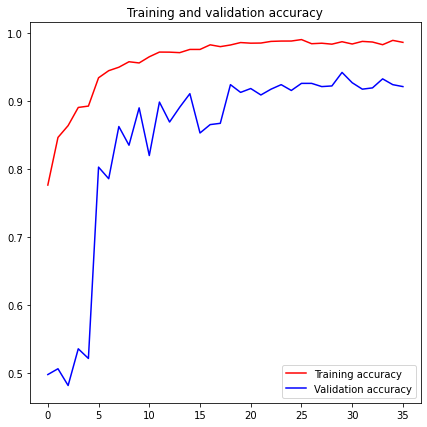

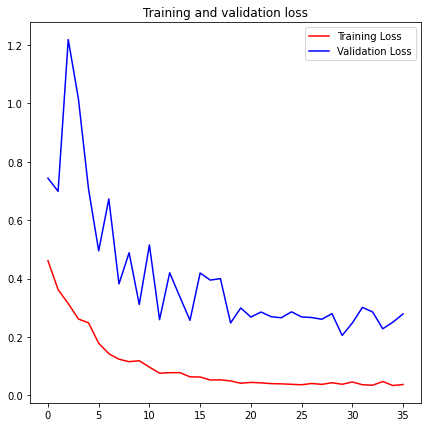

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']+history1.history['accuracy']
val_acc = history.history['val_accuracy']+history1.history['val_accuracy']
loss = history.history['loss']+history1.history['loss']
val_loss = history.history['val_loss']+history1.history['val_loss']

epochs = range(len(acc))

plt.figure(figsize=(7,7))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure(figsize=(7,7))

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
model_effB0.load_weights('/content/drive/MyDrive/model-effB0.h5')
results = model_effB0.evaluate(test_gen, verbose=0)

print("    Loss: {:.4f}".format(results[0]))
print("Accuracy: {:.2f}%".format(results[1] * 100))

In [137]:
test_sample = test_datagen.flow_from_directory('/content/drive/MyDrive/split_data/images/', target_size = (256,256),
                                             batch_size = 32, class_mode = 'binary')

Found 10 images belonging to 2 classes.


In [268]:
for i in range(test_sample.samples):
  if int(test_sample[0][1][i]) == 0:
    print('with_mask')
  else:
    print('no_mask')

with_mask
with_mask
with_mask
no_mask
no_mask
no_mask
no_mask
with_mask
no_mask
no_mask


with_mask


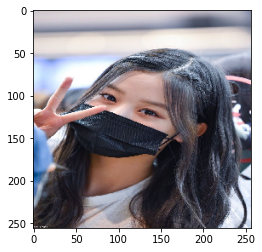

with_mask


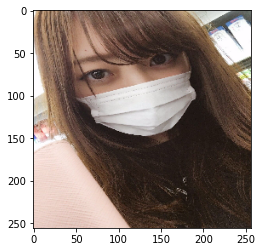

with_mask


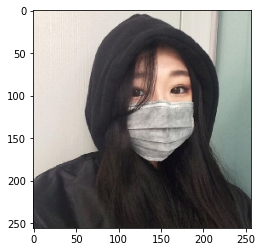

with_mask


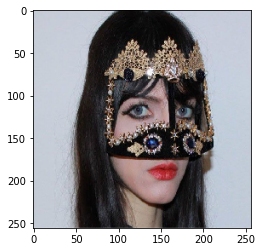

no_mask


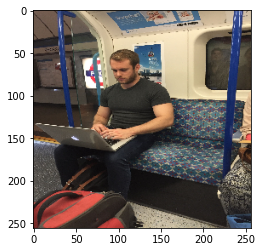

no_mask


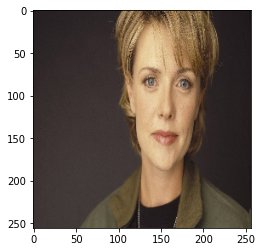

no_mask


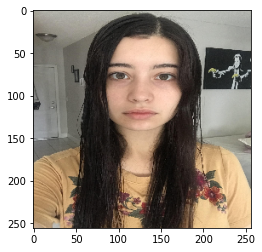

with_mask


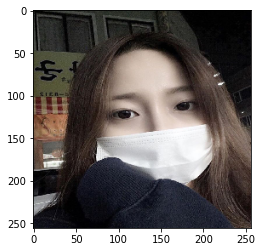

no_mask


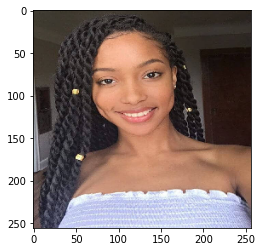

no_mask


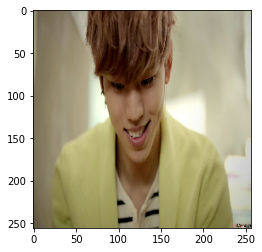

In [269]:
for i in range(test_sample.samples):
  if (model_effB0.predict(test_sample[0][0][i].reshape(-1,256,256,3)) > 0.5).astype("int32") == 1:
    print('no_mask')
    plt.imshow(test_sample[0][0][i])
    plt.show()
  else:
    print('with_mask')
    plt.imshow(test_sample[0][0][i])
    plt.show()